In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Airline Sentiment Project.ipynb',
 'Airline Sentiment.csv',
 'Flight categories pieplot.png',
 'Sentiment barplot.png',
 'text wordcloud.png']

In [3]:
# os.rename('Airline-Sentiment-2-w-Aa.csv', 'Airline Sentiment.csv')

In [4]:
# Reading the data with Pandas
df = pd.read_csv('Airline Sentiment.csv')

In [5]:
df.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,...,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,...,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,...,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,...,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,...,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 21)

In [7]:
df.isnull()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,False,False,False,False,False,False,False,False,True,True,...,True,False,True,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,True,...,True,False,True,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,True,True
14636,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True
14637,False,False,False,False,False,False,False,False,True,True,...,True,False,True,False,False,True,False,False,False,True
14638,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False


In [8]:
df.isnull().sum()

index                               0
_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
df.dtypes

index                             int64
_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_id                        float64
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
df['_unit_state'].value_counts()

finalized      14583
golden            40
in progress       17
Name: _unit_state, dtype: int64

In [11]:
import seaborn as sns

<AxesSubplot: xlabel='_unit_state', ylabel='count'>

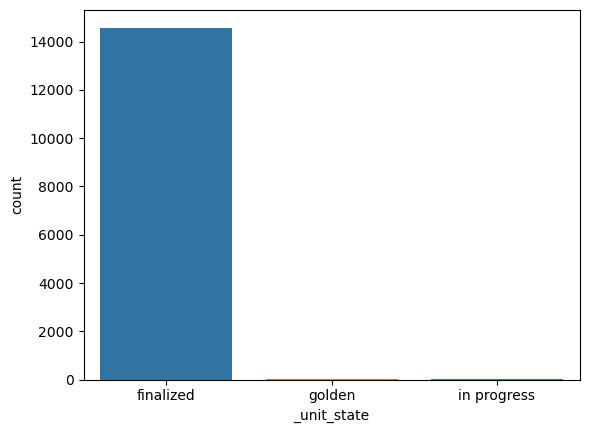

In [12]:
sns.countplot(data = df, x = '_unit_state')

<AxesSubplot: >

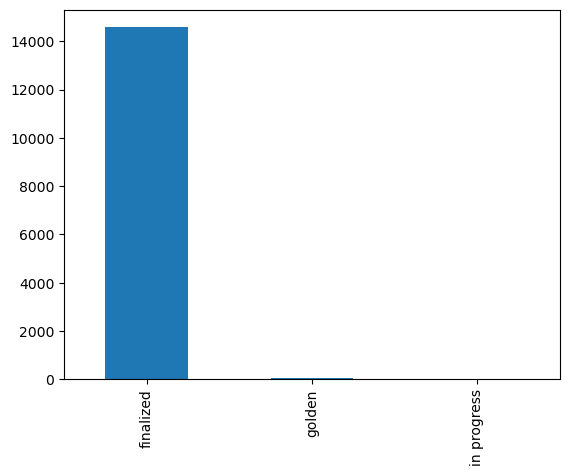

In [13]:
df['_unit_state'].value_counts().plot(kind = 'bar')

In [14]:
df.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,...,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,...,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,...,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,...,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,...,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [15]:
df['_golden'].value_counts()

False    14600
True        40
Name: _golden, dtype: int64

In [16]:
import matplotlib.pyplot as plt

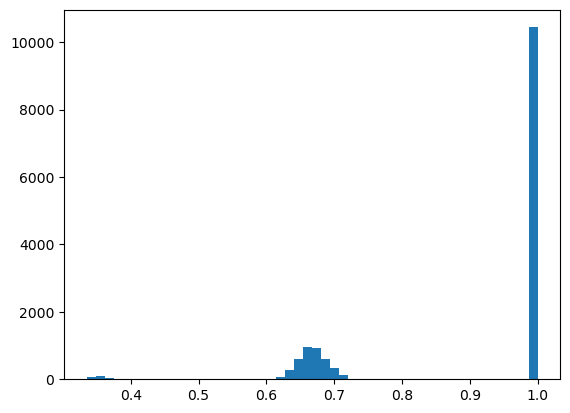

In [17]:
plt.hist(df['airline_sentiment:confidence'], bins = 50)
plt.show()

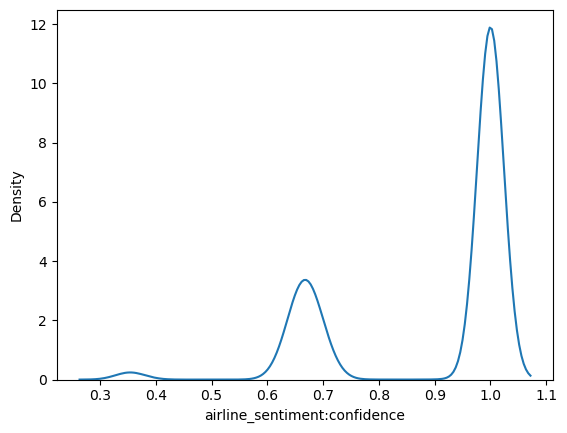

In [18]:
sns.kdeplot(df['airline_sentiment:confidence'])
plt.show()

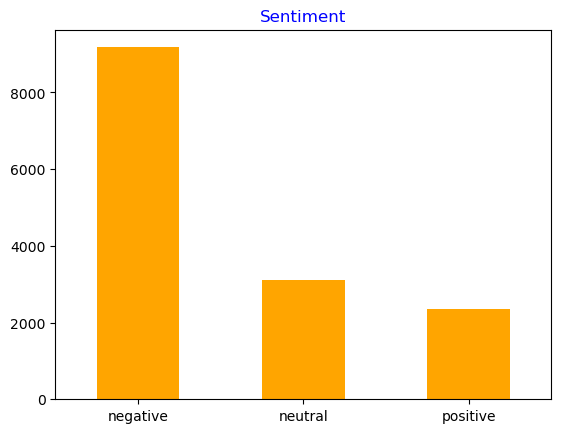

In [19]:
df['airline_sentiment'].value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Sentiment", color = 'blue')
plt.xticks(rotation = 0)
plt.savefig('Sentiment barplot.png')
plt.show()

In [20]:
import colorama

In [21]:
df['_trusted_judgments'].value_counts()

3      14581
2         19
215        3
223        3
229        3
248        3
228        3
225        3
245        2
217        2
241        1
231        1
224        1
230        1
239        1
242        1
244        1
221        1
247        1
236        1
243        1
233        1
219        1
235        1
222        1
211        1
210        1
240        1
Name: _trusted_judgments, dtype: int64

In [22]:
df['text'].iloc[1000]

'@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.'

In [23]:
import string
from nltk.stem import WordNetLemmatizer

In [24]:
from nltk.corpus import stopwords

In [25]:
english_stopwords = stopwords.words('english')

In [26]:
df['text'].tolist()

['@VirginAmerica What @dhepburn said.',
 "@VirginAmerica plus you've added commercials to the experience... tacky.",
 "@VirginAmerica I didn't today... Must mean I need to take another trip!",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this \x89ÛÏear worm\x89Û\x9d won\x89Ûªt go away :)',
 '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 "@virginamerica Well, I didn't\x89Û_but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
 '@VirginAmerica

In [27]:
def text_preprocessor(text):
    
    text_preprocessed = []
    text = list(filter(lambda name: not name.startswith('@'), text.split(' ')))
    text = ' '.join(text)
    text = text.translate(str.maketrans('', '', string.punctuation)) # Removes punctuations
    for word in text.split(' '): # Splits the text into words
        # print(word)
        word = word.lower()
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word)
        if word not in english_stopwords:
            text_preprocessed.append(word)
    text_preprocessed = ' '.join(text_preprocessed)
    return text_preprocessed

In [28]:
df['text'] = df['text'].apply(text_preprocessor)

In [29]:
df.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,...,NaN,cairdin,NaN,0,said,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,...,NaN,jnardino,NaN,0,plus youve added commercial experience tacky,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,...,NaN,yvonnalynn,NaN,0,didnt today must mean need take another trip,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,...,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,...,NaN,jnardino,NaN,0,really big bad thing,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [30]:
df.drop(['index', '_unit_id'], axis = 1, inplace = True)

In [31]:
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercial experience tacky,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didnt today must mean need take another trip,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really big bad thing,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


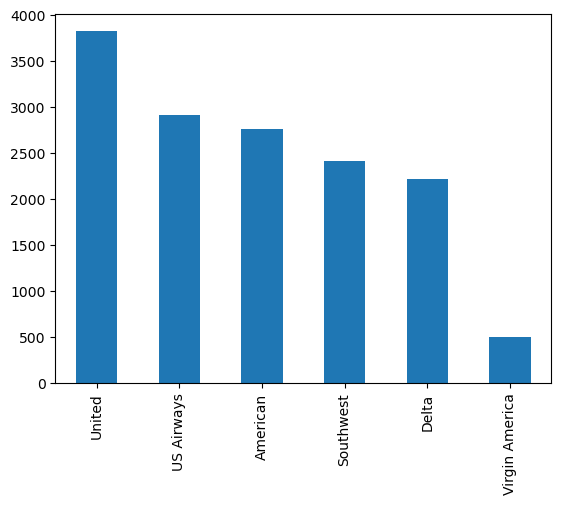

In [32]:
df['airline'].value_counts().plot(kind = 'bar')
plt.show()

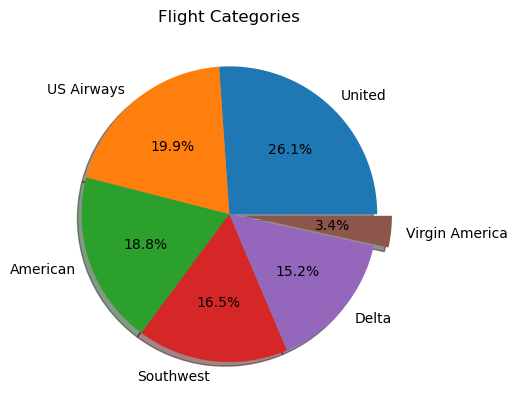

In [33]:
# Creating a list of our flight categories
categories = df['airline'].value_counts(normalize = True).index
sizes = df['airline'].value_counts().tolist()

# Building a pie plot that shows the percentage of airlines for different industries
plt.pie(sizes, labels = categories, shadow = True, autopct='%1.1f%%',
       explode = [0, 0, 0, 0, 0, 0.1])
plt.title('Flight Categories')
plt.savefig('Flight categories pieplot.png')

plt.show()

## WordCloud

In [34]:
from wordcloud import WordCloud

In [35]:
text = " ".join(tweet for tweet in df.text)

In [36]:
wordcloud = WordCloud().generate(text)

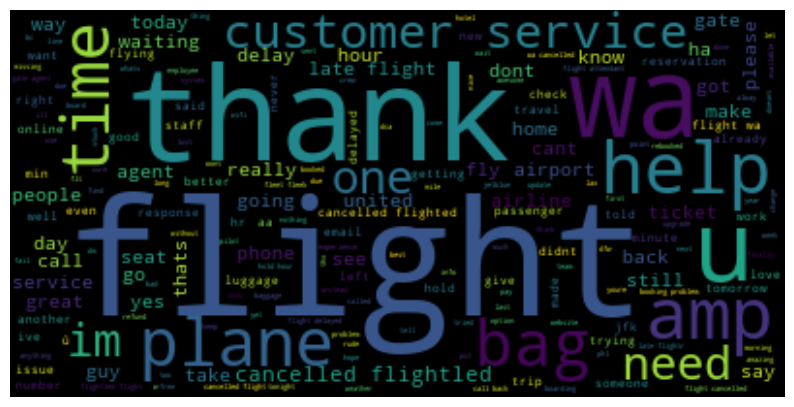

In [37]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('text wordcloud.png', bbox_inches = 'tight')
plt.show()

In [38]:
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercial experience tacky,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didnt today must mean need take another trip,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really big bad thing,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [39]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## WordCloud (Positive Sentiment)

In [42]:
positive_df = df[df['airline_sentiment'] == 'positive']

In [43]:
text = " ".join(tweet for tweet in positive_df.text)

In [44]:
wordcloud = WordCloud().generate(text)

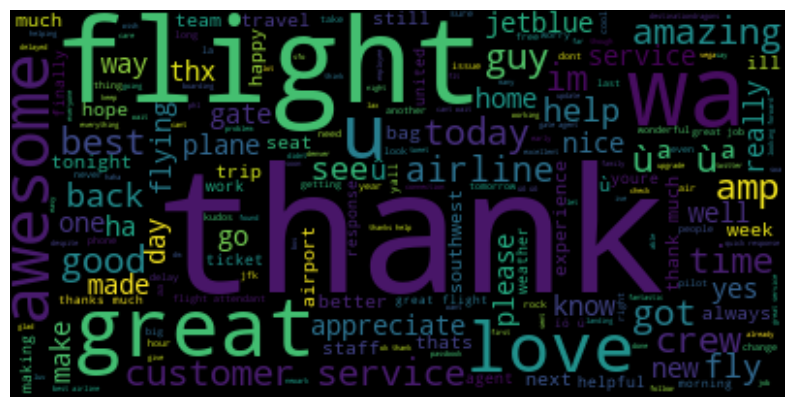

In [45]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('positive text wordcloud.png', bbox_inches = 'tight')
plt.show()

## WordCloud (Negative Sentiment)

In [46]:
negative_df = df[df['airline_sentiment'] == 'negative']

In [47]:
text = " ".join(tweet for tweet in negative_df.text)

In [48]:
wordcloud = WordCloud().generate(text)

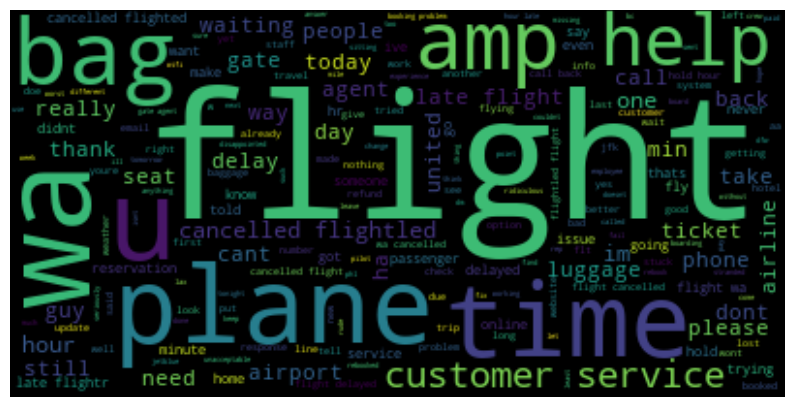

In [49]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('negative text wordcloud.png', bbox_inches = 'tight')
plt.show()